In [2]:
!pip install opendatasets

In [6]:
import opendatasets as od

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  arshadsyed03


Your Kaggle Key:

  ········


100%|██████████| 199k/199k [00:00<00:00, 211kB/s]


Extracting archive .\house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to .\house-prices-advanced-regression-techniques


In [9]:
file =('house-prices-advanced-regression-techniques/train.csv')
data = pd.read_csv(file)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
data.shape

(1460, 81)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
data2=data[['LotArea', 'FullBath', 'HalfBath', 'BedroomAbvGr','SalePrice']]
data2.head()

,LotArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,2,1,3,208500
1,9600,2,0,3,181500
2,11250,2,1,3,223500
3,9550,1,0,3,140000
4,14260,2,1,4,250000


In [13]:
data2.duplicated().sum()

3

In [14]:
data2.drop_duplicates()

,LotArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,2,1,3,208500
1,9600,2,0,3,181500
2,11250,2,1,3,223500
3,9550,1,0,3,140000
4,14260,2,1,4,250000
...,...,...,...,...,...
1455,7917,2,1,3,175000
1456,13175,2,0,3,210000
1457,9042,2,0,4,266500
1458,9717,1,0,2,142125


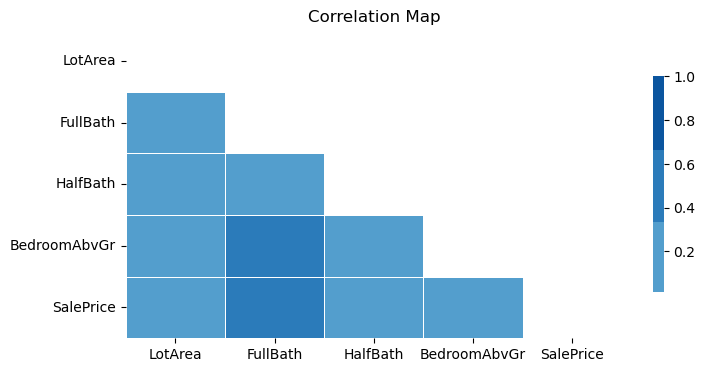

In [15]:

#correlation matrix
fig, axs = plt.subplots(figsize=(8, 4))
mat = data2.corr(method = 'pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, mask=mask, cmap = sns.color_palette('Blues'), vmax=1, center=0, annot = False, linewidths=.5, cbar_kws={'shrink': .7})
axs.set_title("Correlation Map")
plt.show()
     

Text(0.5, 1.0, 'Scatter Relating SalePrice to LotArea')

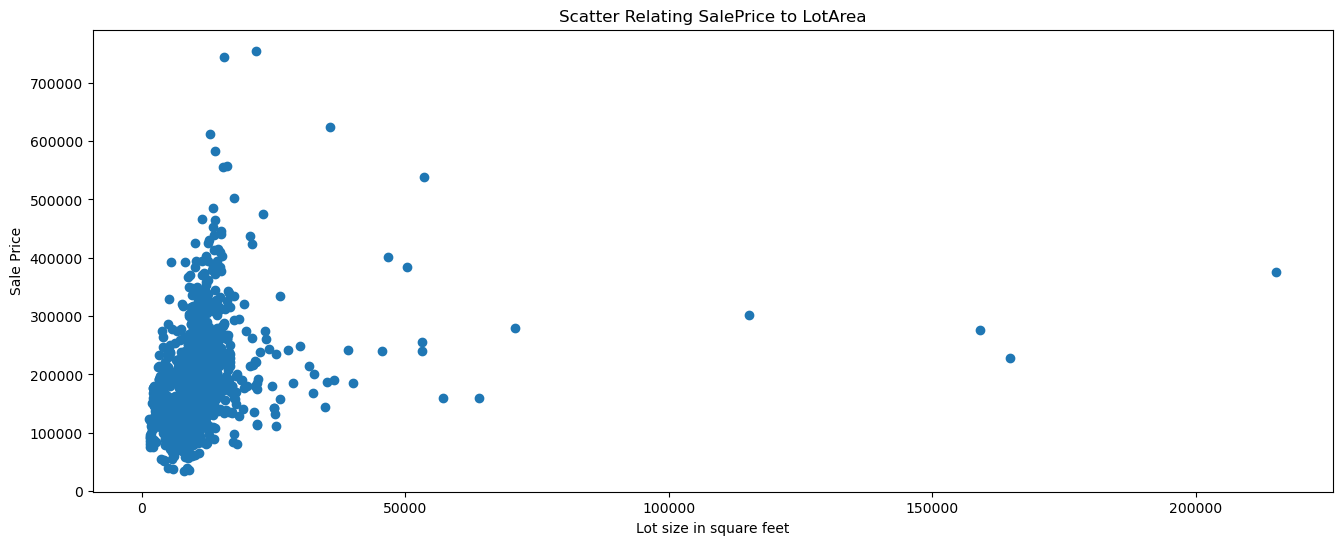

In [16]:
fig, axs = plt.subplots(figsize = (16,6))

axs = plt.scatter(x=data2.LotArea, y=data.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Lot size in square feet')
plt.title('Scatter Relating SalePrice to LotArea')


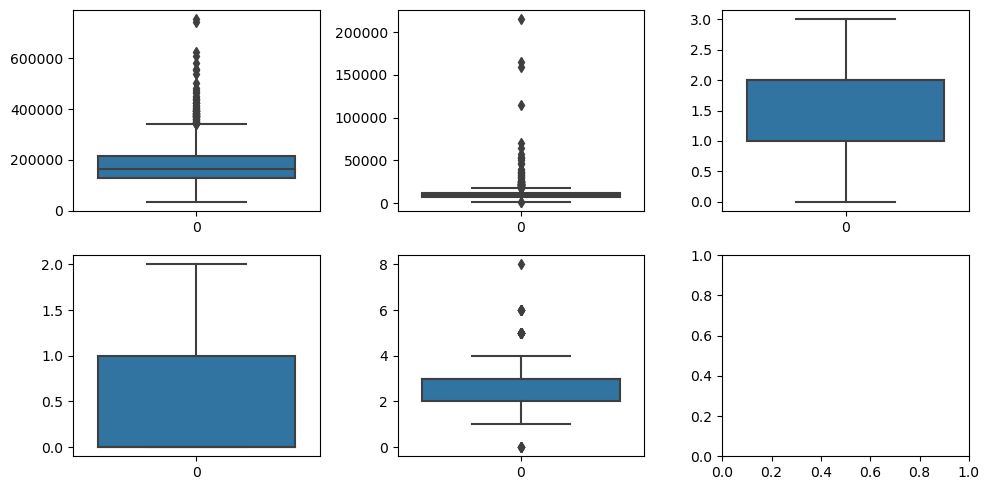

In [17]:
def detectOutliers():
    fig, axs = plt.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(data2['SalePrice'], ax = axs[0,0])
    plt2 = sns.boxplot(data2['LotArea'], ax = axs[0,1])
    plt3 = sns.boxplot(data2['FullBath'], ax = axs[0,2])
    plt1 = sns.boxplot(data2['HalfBath'], ax = axs[1,0])
    plt2 = sns.boxplot(data2['BedroomAbvGr'], ax = axs[1,1])
    plt.tight_layout()
detectOutliers()

In [18]:
# Outlier reduction for price
Q1 = data2.SalePrice.quantile(0.25)
Q3 = data2.SalePrice.quantile(0.75)
IQR = Q3 - Q1
data2 = data2[(data2.SalePrice >= Q1 - 1.5*IQR) & (data2.SalePrice <= Q3 + 1.5*IQR)]
# Outlier reduction for area
Q1 = data2.LotArea.quantile(0.25)
Q3 = data2.LotArea.quantile(0.75)
IQR = Q3 - Q1
data2 = data2[(data2.LotArea >= Q1 - 1.5*IQR) & (data2.LotArea <= Q3 + 1.5*IQR)]

# Outlier reduction for area
Q1 = data2.BedroomAbvGr.quantile(0.25)
Q3 = data2.BedroomAbvGr.quantile(0.75)
IQR = Q3 - Q1
data2 = data2[(data2.BedroomAbvGr >= Q1 - 1.5*IQR) & (data2.BedroomAbvGr <= Q3 + 1.5*IQR)]

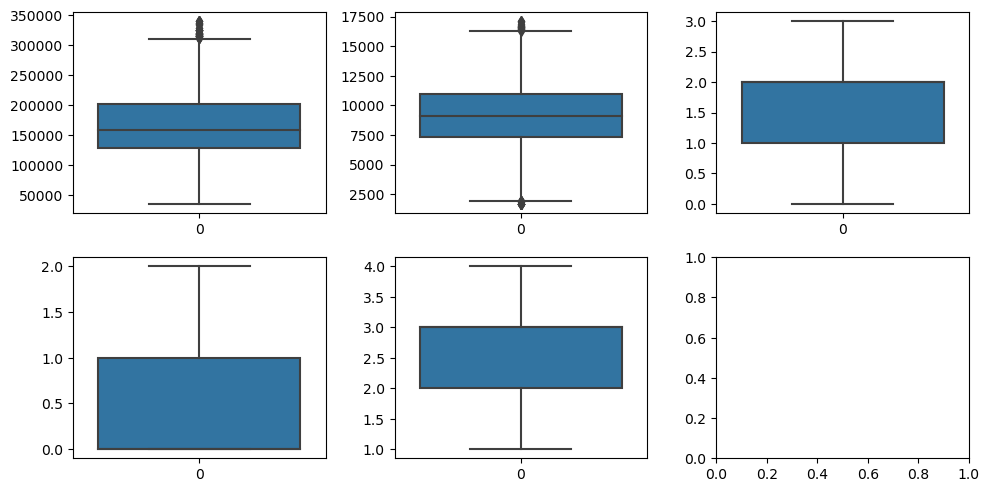

In [19]:
detectOutliers()

In [20]:
data2.dtypes


LotArea         int64
FullBath        int64
HalfBath        int64
BedroomAbvGr    int64
SalePrice       int64
dtype: object

In [21]:
X = data2.drop('SalePrice',axis=1)
y = data2['SalePrice']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=33)

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [26]:
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [27]:
y_pred = lr_model.predict(X_test)

In [28]:
r2 = round(r2_score(y_test,y_pred),5)
print('Coefficient of determination R2: ', r2)

Coefficient of determination R2:  0.48489


Text(0.5, 1.0, 'Scatter chart - Linear regression model')

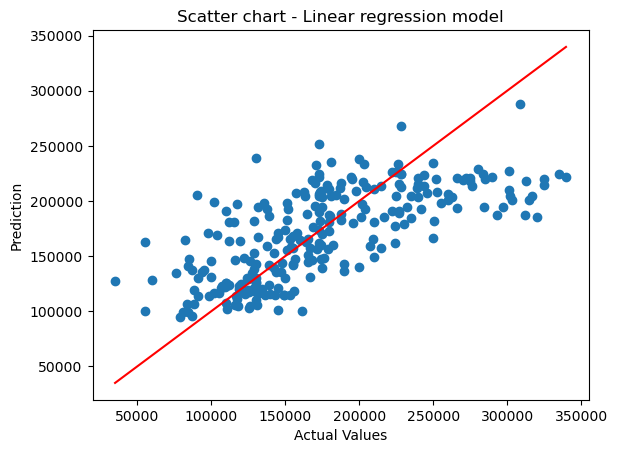

In [29]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.title('Scatter chart - Linear regression model')